1.

Wiandt, T. J. (2007). SPRT Calibration Uncertainties and Internal Quality Control at a Commercial SPRT Calibration Facility.

The need for accurate temperature measurements in various areas has driven this research work, which aims to design and develop a prototype standard for calibrating the 0 °C point. This system, based on an ESP32 microcontroller and a precision thermoresistance, has been designed to use the triple point of water as a reference. By providing a reliable and repeatable calibration method, the prototype will enable access to high-precision calibration.
The work describes the calibration facilities, the procedure, the uncertainty analysis, and the quality control measures. It addresses the challenge of balancing metrological accuracy with efficiency, employing a strategy that includes statistical control and internal consistency measures to ensure device reliability during calibrations [1]. It is important to use a high-precision thermoresistance for the implementation of the prototype.
One of the most accurate resistance thermometers for calibration due to its traceability, platinum purity, and construction is the SPRT (Standard Platinum Resistance Thermometer). Standard platinum resistance thermometers meet very specific requirements defined by the International Temperature Scale of 1990 (ITS-90).
The objective is to develop a standard prototype for temperature calibration at 0 °C using an ESP32 microcontroller and a specific sensor that supports calibrations with the water triple point device. Once the measurement system has been obtained, we must perform stability, repeatability, and validation tests with all sources of uncertainty associated with the process.

2.

Data loading and initial visualization:


*  *Date:* date of measurement.
*  *Day:* day of measurement.
*  *Time:* time at which the measurement was taken.
*  *Triplepointw:* measuring device used, in which 0 °C is guaranteed.
*  *SprtTemperature:* reference prototype implemented with an SPRT (standard platinum resistance thermometer) sensor.
*  *ReferenceTemperature:* reference thermometer used for direct comparison.
*  *SprtOhms:* values taken by the SPRT transducer in ohms.

A database with measurements taken during February 2025 was selected to visualize the behavior of the implemented instrument (SprtTemperature) and to obtain measurements at the triple point of water. It was also considered necessary to obtain the ohm value of the SPRT sensor (SprtOhms) and a reference instrument for direct comparison during temperature measurement (ReferenceTemperature). Since the triple point of water generates the necessary conditions to measure the 0 °C point, the above database allows the behavior of the implemented instrument (SprtTemperature) to be verified.

Proper data loading and handling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/s_programing/

1_DataTime_Point_TPW.csv  eda_oop_lab.py


Below is the structure of the first 10 measurements taken from the database selected for the exercise:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


path = "/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"

df = pd.read_csv(path,sep=None, engine="python")
print(df.head(10))

         Date       Day      Time  TriplePointw  SprtTemperature  \
0  2025-02-01  Saturday  08:00:00           0.0         0.000211   
1  2025-02-01  Saturday  08:06:00           0.0        -0.003366   
2  2025-02-01  Saturday  08:10:00           0.0        -0.000643   
3  2025-02-01  Saturday  08:12:00           0.0         0.001813   
4  2025-02-01  Saturday  08:12:00           0.0         0.000623   
5  2025-02-01  Saturday  08:14:00           0.0         0.001121   
6  2025-02-01  Saturday  08:18:00           0.0         0.003850   
7  2025-02-01  Saturday  08:18:00           0.0         0.003831   
8  2025-02-01  Saturday  08:18:00           0.0         0.002953   
9  2025-02-01  Saturday  08:18:00           0.0        -0.001503   

   ReferenceTemperature  SprtOhms  
0             -0.001764  1000.000  
1             -0.002924   999.987  
2             -0.002250   999.998  
3             -0.001265  1000.010  
4              0.003251  1000.000  
5              0.001797  1000.000  

In [ ]:
df.columns

Index(['Date', 'Day', 'Time', 'TriplePointw', 'SprtTemperature',
       'ReferenceTemperature', 'SprtOhms'],
      dtype='object')

In [ ]:
def graph(date, n_point):

  sen_tem_p = df[df["Date"] == date]['ReferenceTemperature']
  sen_tem = df[df["Date"] == date]['SprtTemperature']

  tm = df[df["Date"] == date]["Time"]

  day = df[df["Date"] == date]["Day"].unique()

  plt.figure(figsize=(12,6))
  plt.plot(tm[:n_point], sen_tem_p[:n_point], label="SPRT", marker='o', markersize=3)
  plt.plot(tm[:n_point], sen_tem[:n_point], label="Ref", marker='x', markersize=3)

  plt.xlabel(f"Time {date}")
  plt.ylabel("Temperature (°C)")
  plt.title(f"Temperature Measurements - {day[0]} {date} (SPRT vs Ref)")
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In this section, we can observe the behavior of the implemented instrument (SprtTemperature) and the reference instrument (ReferenceTemperature). We must select the date and number of measurements we wish to evaluate:

In [ ]:
date = "2025-02-18"
n_point = 50

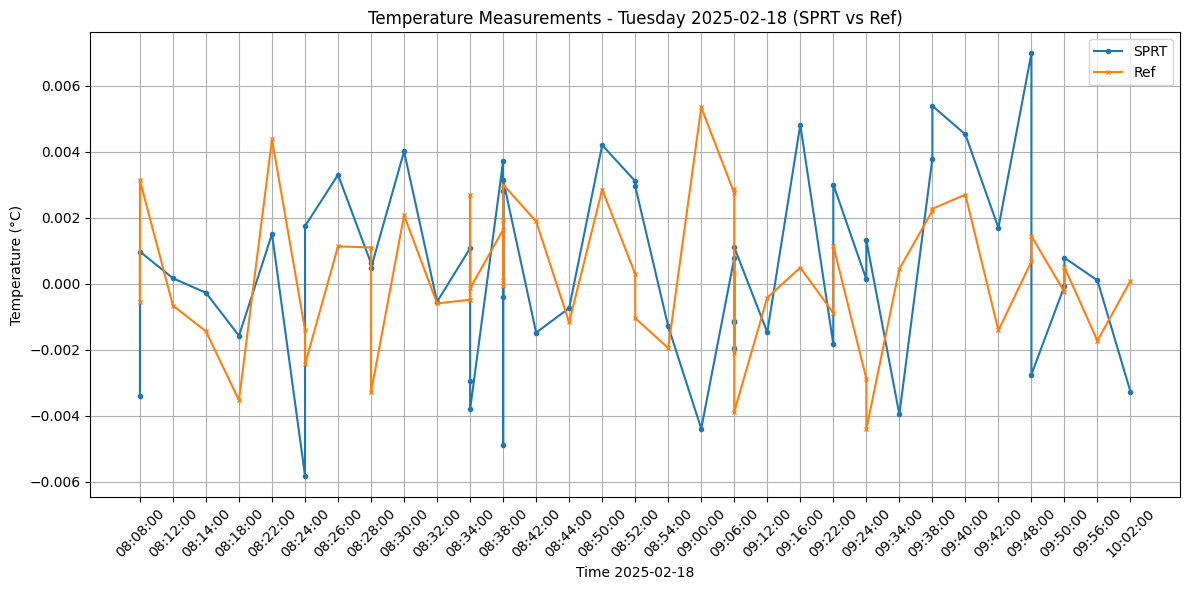

In [ ]:
graph(date, n_point)

In [ ]:
import numpy as np

In this section, we can obtain the average of the measurements for the selected day, obtaining a result with 6 significant figures:

In [ ]:
def mean_sprt_ref(date):

  sen_tem_ref = df[df["Date"] == date]['ReferenceTemperature']
  sen_tem_sprt = df[df["Date"] == date]['SprtTemperature']

  return np.mean(sen_tem_ref), np.mean(sen_tem_sprt)

In [ ]:
date = "2025-02-04"

In [ ]:
mean_tem_ref, mean_tem_sprt = mean_sprt_ref(date)
print(f"{mean_tem_ref: .6f}, {mean_tem_sprt: .6f}")

 0.000189,  0.000147


In this section, we start with a filter for dates, with the purpose of evaluating the average of daily measurements during the month of February in the implemented instrument (SprtTemperature) and the reference instrument (ReferenceTemperature):

In [ ]:
for i in range(1, 29):
    date = f"2025-02-{i:02d}"


    df_day = df[df["Date"] == date]

    if not df_day.empty:
        mean_tem_ref = df_day["ReferenceTemperature"].mean()
        mean_tem_sprt = df_day["SprtTemperature"].mean()
        print(f"{date} -> ReferenceTemperature: {mean_tem_ref:.6f}, SprtTemperature: {mean_tem_sprt:.6f}")
    else:
        print(f"{date} -> No hay datos")

2025-02-01 -> ReferenceTemperature: 0.000083, SprtTemperature: 0.000232
2025-02-02 -> ReferenceTemperature: -0.000188, SprtTemperature: 0.000161
2025-02-03 -> ReferenceTemperature: -0.000290, SprtTemperature: 0.000129
2025-02-04 -> ReferenceTemperature: 0.000189, SprtTemperature: 0.000147
2025-02-05 -> ReferenceTemperature: 0.000380, SprtTemperature: 0.000066
2025-02-06 -> ReferenceTemperature: 0.000261, SprtTemperature: 0.000377
2025-02-07 -> ReferenceTemperature: 0.000022, SprtTemperature: 0.000292
2025-02-08 -> ReferenceTemperature: 0.000280, SprtTemperature: 0.000117
2025-02-09 -> ReferenceTemperature: -0.000096, SprtTemperature: -0.000122
2025-02-10 -> ReferenceTemperature: 0.000384, SprtTemperature: 0.000004
2025-02-11 -> ReferenceTemperature: -0.000031, SprtTemperature: 0.000234
2025-02-12 -> ReferenceTemperature: 0.000092, SprtTemperature: -0.000086
2025-02-13 -> ReferenceTemperature: -0.000236, SprtTemperature: 0.000291
2025-02-14 -> ReferenceTemperature: 0.000038, SprtTempera

In this section, measurements are taken during the month of February in order to evaluate the average of the daily measurements and the dispersion of their data with the standard deviation in the implemented instrument (SprtTemperature) and the reference instrument (ReferenceTemperature):

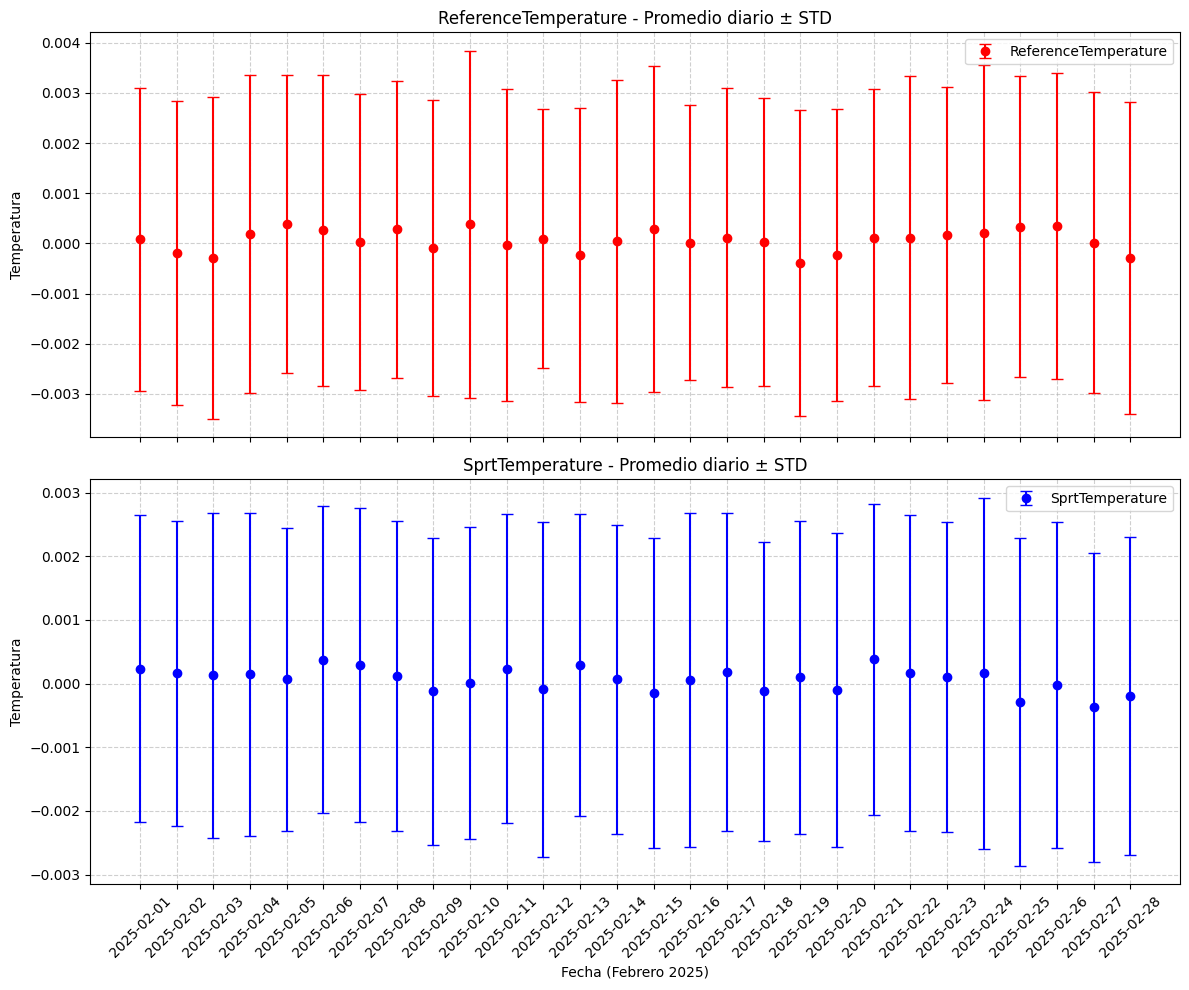

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


list_mean_tem_ref = []
list_std_tem_ref = []
list_mean_tem_sprt = []
list_std_tem_sprt = []
list_date = []


for i in range(1, 29):
    date = f"2025-02-{i:02d}"
    df_day = df[df["Date"] == date]

    if not df_day.empty:
        list_mean_tem_ref.append(df_day["ReferenceTemperature"].mean())
        list_std_tem_ref.append(df_day["ReferenceTemperature"].std())
        list_mean_tem_sprt.append(df_day["SprtTemperature"].mean())
        list_std_tem_sprt.append(df_day["SprtTemperature"].std())
        list_date.append(date)


fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)


axes[0].errorbar(list_date, list_mean_tem_ref, yerr=list_std_tem_ref,
                 fmt='o', color="red", capsize=4, label="ReferenceTemperature")
axes[0].set_ylabel("Temperatura")
axes[0].set_title("ReferenceTemperature - Promedio diario ± STD")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].legend()


axes[1].errorbar(list_date, list_mean_tem_sprt, yerr=list_std_tem_sprt,
                 fmt='o', color="blue", capsize=4, label="SprtTemperature")
axes[1].set_xlabel("Fecha (Febrero 2025)")
axes[1].set_ylabel("Temperatura")
axes[1].set_title("SprtTemperature - Promedio diario ± STD")
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this section, we obtain the correction according to the difference between the average daily measurements of the reference instrument (ReferenceTemperature) with respect to the implemented instrument (SprtTemperature). Subsequently, as a practical exercise, the correction is applied to the instrument under test and its behavior over time is observed:

In [ ]:
for i in range(1, 29):
    date = f"2025-02-{i:02d}"


    df_day = df[df["Date"] == date]



    if not df_day.empty:
        mean_tem_ref = df_day["ReferenceTemperature"].mean()
        mean_tem_sprt = df_day["SprtTemperature"].mean()
        correccion = mean_tem_ref - mean_tem_sprt
        Sprtcorrec = mean_tem_sprt + correccion
        print(f"{date} -> ReferenceTemperature: {mean_tem_ref:.6f},  SprtTemperature: {mean_tem_sprt:.6f},  Correction: {correccion: .6f},  SprtCorrection: {Sprtcorrec: .6f}")


2025-02-01 -> ReferenceTemperature: 0.000083,  SprtTemperature: 0.000232,  Correction: -0.000149,  SprtCorrection:  0.000083
2025-02-02 -> ReferenceTemperature: -0.000188,  SprtTemperature: 0.000161,  Correction: -0.000348,  SprtCorrection: -0.000188
2025-02-03 -> ReferenceTemperature: -0.000290,  SprtTemperature: 0.000129,  Correction: -0.000419,  SprtCorrection: -0.000290
2025-02-04 -> ReferenceTemperature: 0.000189,  SprtTemperature: 0.000147,  Correction:  0.000043,  SprtCorrection:  0.000189
2025-02-05 -> ReferenceTemperature: 0.000380,  SprtTemperature: 0.000066,  Correction:  0.000314,  SprtCorrection:  0.000380
2025-02-06 -> ReferenceTemperature: 0.000261,  SprtTemperature: 0.000377,  Correction: -0.000116,  SprtCorrection:  0.000261
2025-02-07 -> ReferenceTemperature: 0.000022,  SprtTemperature: 0.000292,  Correction: -0.000270,  SprtCorrection:  0.000022
2025-02-08 -> ReferenceTemperature: 0.000280,  SprtTemperature: 0.000117,  Correction:  0.000163,  SprtCorrection:  0.00028

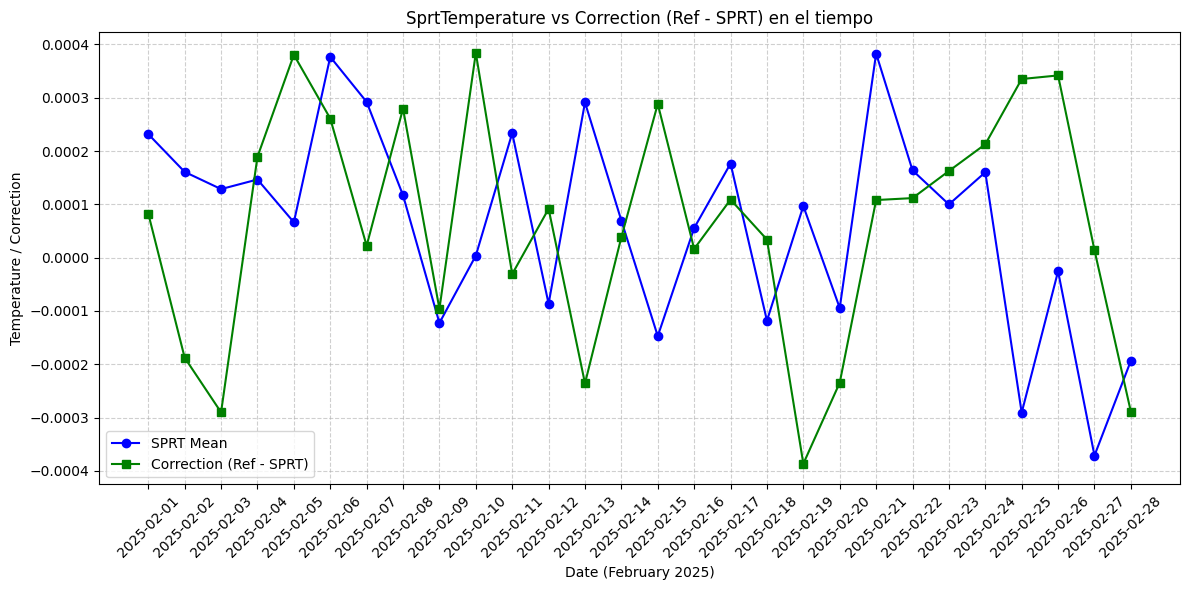

In [ ]:
list_date = []
list_mean_sprt = []
list_correction = []

for i in range(1, 29):
    date = f"2025-02-{i:02d}"
    df_day = df[df["Date"] == date]

    if not df_day.empty:
        mean_tem_ref = np.mean(df_day["ReferenceTemperature"])
        mean_tem_sprt = np.mean(df_day["SprtTemperature"])

        correc = mean_tem_ref - mean_tem_sprt
        correc_sprt = mean_tem_sprt + correc

        list_date.append(date)
        list_mean_sprt.append(mean_tem_sprt)
        list_correction.append(correc_sprt)


plt.figure(figsize=(12,6))

plt.plot(list_date, list_mean_sprt, marker='o', color='blue', label="SPRT Mean")
plt.plot(list_date, list_correction, marker='s', color='green', label="Correction (Ref - SPRT)")

plt.xticks(rotation=45)
plt.xlabel("Date (February 2025)")
plt.ylabel("Temperature / Correction")
plt.title("SprtTemperature vs Correction (Ref - SPRT) en el tiempo")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In this section, we obtain the comparison of the corrected variable of the implemented instrument (SprtCorrection) with respect to the difference between the average daily measurements of the reference instrument (ReferenceTemperature):

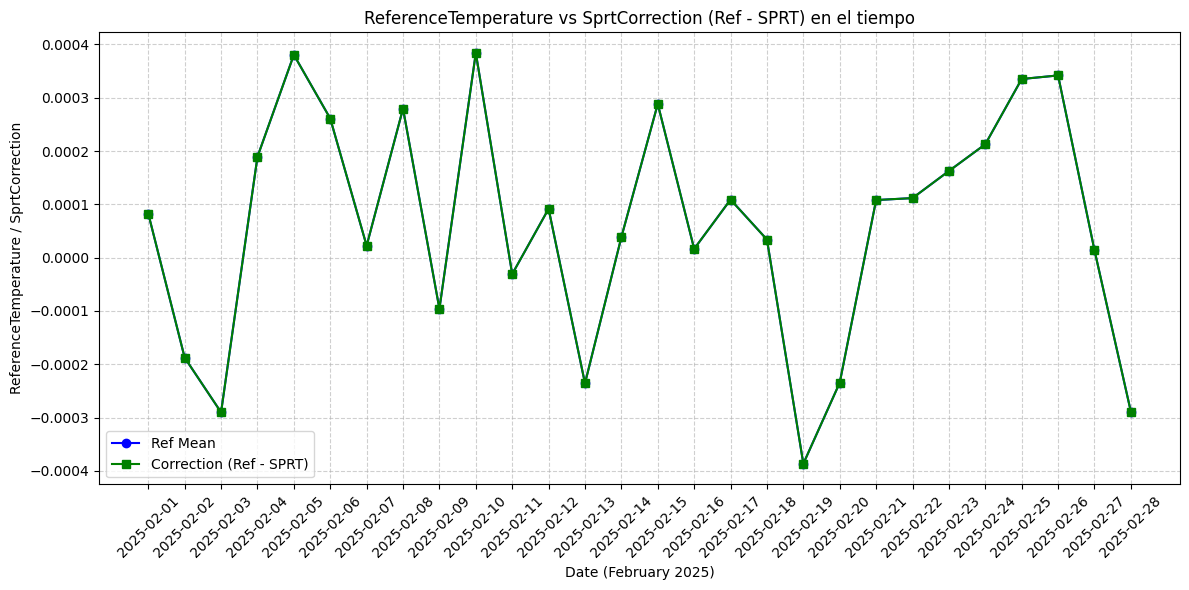

In [ ]:
list_date = []
list_mean_ref = []
list_correction = []

for i in range(1, 29):
    date = f"2025-02-{i:02d}"
    df_day = df[df["Date"] == date]

    if not df_day.empty:
        mean_tem_ref = np.mean(df_day["ReferenceTemperature"])
        mean_tem_sprt = np.mean(df_day["SprtTemperature"])

        correc = mean_tem_ref - mean_tem_sprt
        correc_sprt = mean_tem_sprt + correc

        list_date.append(date)
        list_mean_ref.append(mean_tem_ref)
        list_correction.append(correc_sprt)


plt.figure(figsize=(12,6))

plt.plot(list_date, list_mean_ref, marker='o', color='blue', label="Ref Mean")
plt.plot(list_date, list_correction, marker='s', color='green', label="Correction (Ref - SPRT)")

plt.xticks(rotation=45)
plt.xlabel("Date (February 2025)")
plt.ylabel("ReferenceTemperature / SprtCorrection")
plt.title("ReferenceTemperature vs SprtCorrection (Ref - SPRT) en el tiempo")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

3.


Contenido filtrado por día:


/tmp/ipython-input-604086426.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["DateTime"] = pd.to_datetime(


,Date,Day,Time,TriplePointw,SprtTemperature,ReferenceTemperature,SprtOhms,DateTime
4792,2025-02-28,Friday,08:00:00,0.0,-0.002320,-0.003745,999.991,2025-02-28 08:00:00
4793,2025-02-28,Friday,08:02:00,0.0,0.001123,-0.002708,1000.000,2025-02-28 08:02:00
4794,2025-02-28,Friday,08:04:00,0.0,-0.000540,0.000351,999.998,2025-02-28 08:04:00
4795,2025-02-28,Friday,08:06:00,0.0,-0.000471,-0.003021,999.998,2025-02-28 08:06:00
4796,2025-02-28,Friday,08:06:00,0.0,-0.000555,0.003607,999.998,2025-02-28 08:06:00


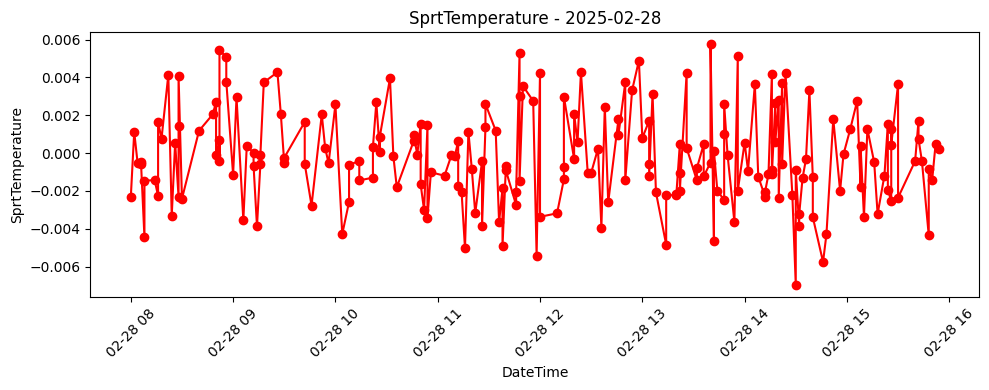

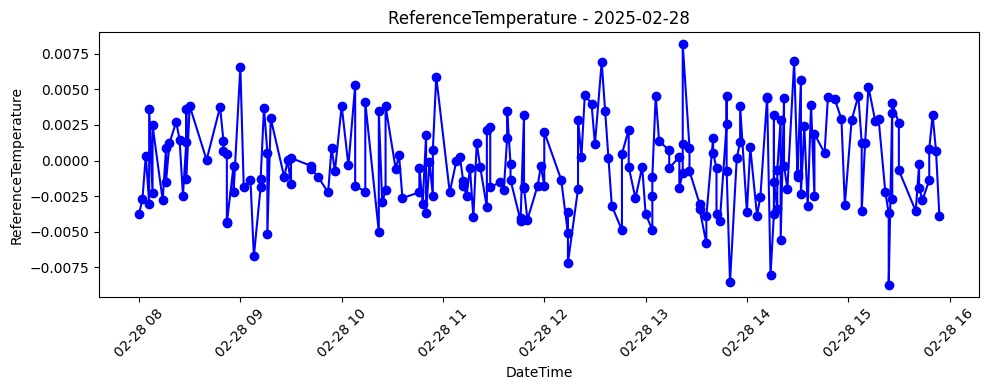

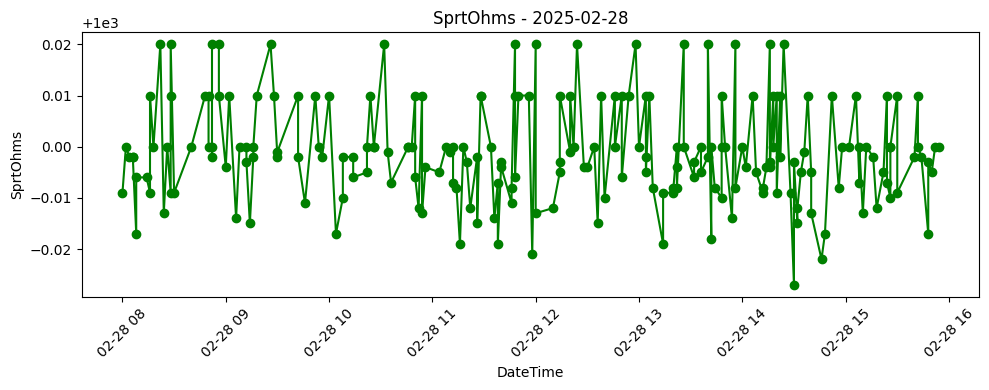

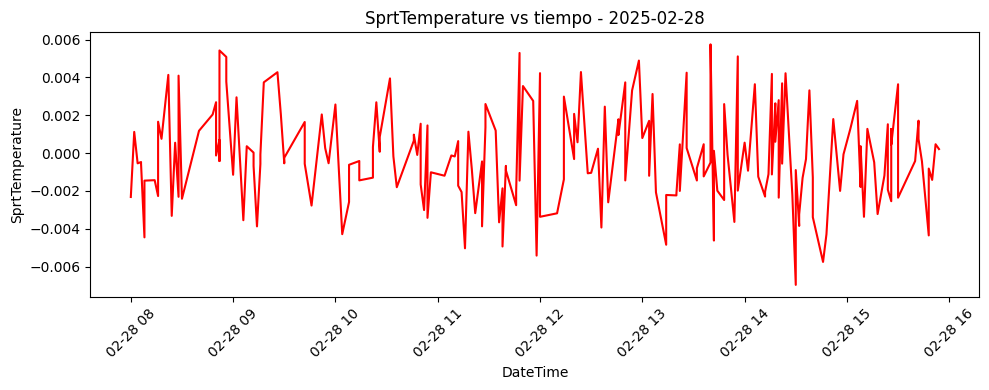

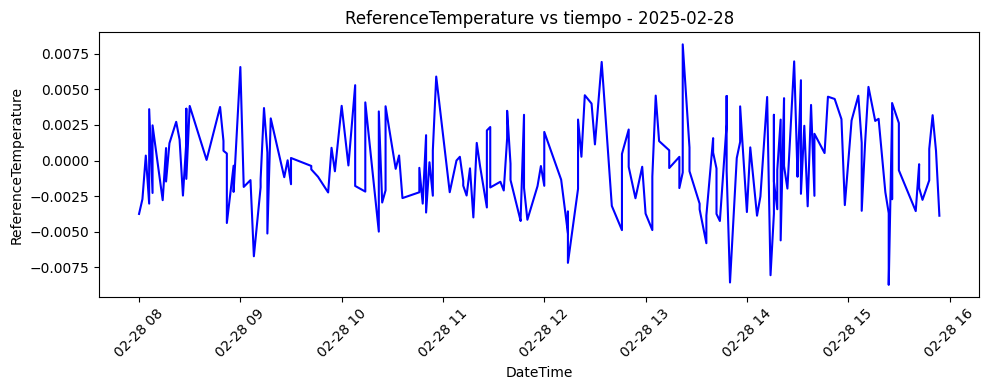

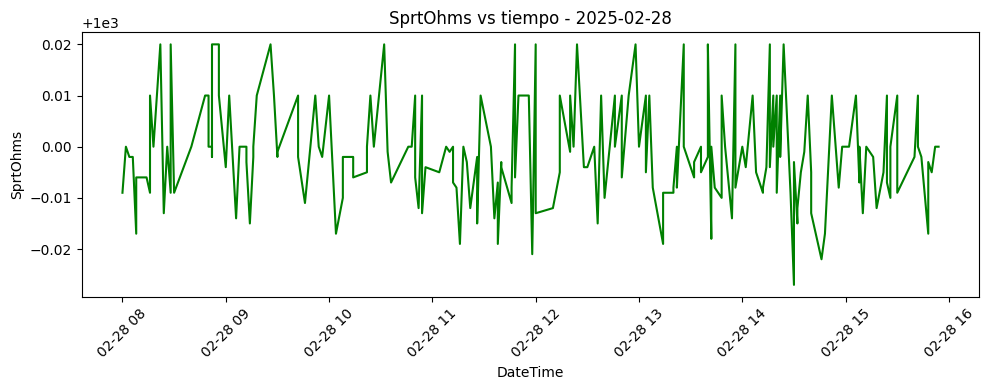

In [ ]:
# 0) Helper para garantizar DateTime
def ensure_datetime(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # Limpia espacios
    for c in df.columns:
        if df[c].dtype == "object":
            df[c] = df[c].astype(str).str.strip()

    # Caso 1: ya existe DateTime
    if "DateTime" in df.columns:
        df["DateTime"] = pd.to_datetime(df["DateTime"], errors="coerce")
        return df

    # Caso 2: construir desde Date + Time
    if {"Date", "Time"}.issubset(df.columns):
        df["DateTime"] = pd.to_datetime(
            df["Date"].astype(str) + " " + df["Time"].astype(str),
            errors="coerce",
            infer_datetime_format=True
        )
        return df

    # Caso 3: solo Date
    if "Date" in df.columns:
        df["DateTime"] = pd.to_datetime(df["Date"], errors="coerce", infer_datetime_format=True)
        return df

    # Caso 4: solo Time (no recomendado; pandas pone una fecha por defecto)
    if "Time" in df.columns:
        df["DateTime"] = pd.to_datetime(df["Time"], errors="coerce", infer_datetime_format=True)
        return df

    # Si no hay nada que parsear, regresa tal cual
    return df


# 1) Lee el CSV y garantiza DateTime
path = "/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"
df = pd.read_csv(path, sep=None, engine="python")
df = ensure_datetime(df)

# 2) TimeFilter mejorado (elige DateTime si existe)
class TimeFilter:
    def __init__(self, df: pd.DataFrame, time_col=None):
        self.df = df.copy()
        self.time_col = time_col
        self.__post_init__()

    def __post_init__(self):
        # Prioriza DateTime si no se especifica
        if self.time_col is None:
            if "DateTime" in self.df.columns and np.issubdtype(self.df["DateTime"].dtype, np.datetime64):
                self.time_col = "DateTime"
            elif "Date" in self.df.columns and np.issubdtype(self.df["Date"].dtype, np.datetime64):
                self.time_col = "Date"
            else:
                # Si existe DateTime pero no es datetime, intenta parsear
                if "DateTime" in self.df.columns:
                    self.df["DateTime"] = pd.to_datetime(self.df["DateTime"], errors="coerce")
                    if np.issubdtype(self.df["DateTime"].dtype, np.datetime64):
                        self.time_col = "DateTime"
                else:
                    self.time_col = None

        # Asegura dtype datetime64 en la columna de tiempo elegida
        if self.time_col and not np.issubdtype(self.df[self.time_col].dtype, np.datetime64):
            self.df[self.time_col] = pd.to_datetime(self.df[self.time_col], errors="coerce")

    def filter_by_day(self, day: str):
        if not self.time_col:
            return self.df.copy()
        d = pd.to_datetime(day).date()
        mask = self.df[self.time_col].dt.date == d
        return self.df.loc[mask].copy()

    def available_days(self):
        if not self.time_col:
            return []
        return sorted({d.date() for d in self.df[self.time_col].dropna()})

# 3) Ahora sí, crea el filtro usando DateTime (o Date si fuera el caso)
flt = TimeFilter(df)
days = flt.available_days()

if not days:
    print("No se pudo construir una columna de tiempo válida (DateTime/Date). Revisa formatos de 'Date' y 'Time'.")
else:
    # Usa un día disponible (el primero o el último, como prefieras)
    target_day = str(days[-1])  # último día disponible
    df_day = flt.filter_by_day(target_day)

    from IPython.display import display
    print("\nContenido filtrado por día:")
    display(df_day.head(5))

    color_map = {"SprtTemperature": "red", "ReferenceTemperature": "blue", "SprtOhms": "green"}
    plot_cols = [c for c in ["SprtTemperature", "ReferenceTemperature", "SprtOhms"] if c in df_day.columns]

    time_key = flt.time_col  # usa la columna de tiempo efectiva

    if time_key not in df_day.columns:
        print(f"No hay columna temporal '{time_key}' en el filtrado; no se grafican series temporales.")
    else:
        # 6) Gráficos
        for col in plot_cols:
            tmp = df_day[[time_key, col]].dropna().sort_values(by=time_key)
            if tmp.empty:
                continue
            plt.figure(figsize=(10,4))
            plt.plot(tmp[time_key], tmp[col], marker="o", color=color_map.get(col, "black"))
            plt.title(f"{col} - {target_day}")
            plt.xlabel(time_key); plt.ylabel(col)
            plt.xticks(rotation=45); plt.tight_layout(); plt.show()

        # 7) Repite el patrón (ya sin KeyError)
        for col in plot_cols:
            tmp = df_day[[time_key, col]].dropna().sort_values(by=time_key)
            if not tmp.empty:
                plt.figure(figsize=(10,4))
                plt.plot(tmp[time_key], tmp[col], color=color_map.get(col, "black"))
                plt.title(f"{col} vs tiempo - {target_day}")
                plt.xlabel(time_key); plt.ylabel(col)
                plt.xticks(rotation=45); plt.tight_layout(); plt.show()


In [ ]:
class DataTime:
    """
    Clase orientada a objetos para trabajar con datos que tienen columnas de fecha y hora.
    """
    def __init__(self, path: str, sep: str = ",", encoding: str = "utf-8"):
        self.path = path
        self.sep = sep
        self.encoding = encoding
        self.df: Optional[pd.DataFrame] = None

    def load(self) -> "DataTime":
        """Carga el archivo CSV en un DataFrame."""
        self.df = pd.read_csv(self.path, sep=self.sep, encoding=self.encoding, low_memory=False)
        return self

    def build_datetime(self, date_col: str = "Date", time_col: str = "Time", new_col: str = "DateTime") -> "DataTime":
        """Crea una columna DateTime a partir de columnas Date y Time."""
        if self.df is None:
            raise ValueError("Primero cargue los datos con .load()")
        self.df[new_col] = pd.to_datetime(self.df[date_col].astype(str) + " " + self.df[time_col].astype(str),
                                          errors="coerce")
        return self

    def filter_by_day(self, day: str, col: str = "DateTime") -> pd.DataFrame:
        """Filtra los datos por un día específico (YYYY-MM-DD)."""
        if self.df is None:
            raise ValueError("Primero cargue los datos con .load() y construya DateTime")
        if col not in self.df.columns:
            raise ValueError(f"La columna {col} no existe en el DataFrame.")
        d = pd.to_datetime(day).date()
        mask = self.df[col].dt.date == d
        result = self.df.loc[mask].copy()
        print(f"✅ {len(result)} registros encontrados para el día {day}")
        return result

    def filter_by_range(self, start: str, end: str, col: str = "DateTime") -> pd.DataFrame:
        """Filtra los datos por un rango de fechas/horas."""
        if self.df is None:
            raise ValueError("Primero cargue los datos con .load() y construya DateTime")
        if col not in self.df.columns:
            raise ValueError(f"La columna {col} no existe en el DataFrame.")
        start_dt = pd.to_datetime(start)
        end_dt = pd.to_datetime(end)
        mask = (self.df[col] >= start_dt) & (self.df[col] <= end_dt)
        result = self.df.loc[mask].copy()
        print(f"✅ {len(result)} registros encontrados entre {start} y {end}")
        return result

In [ ]:
class TimeFilter:
    def __init__(self, df: pd.DataFrame, time_col=None):
        self.df = df.copy()
        self.time_col = time_col
        self.__post_init__()

    def __post_init__(self):
        if self.time_col is None:
            if "DateTime" in self.df.columns and np.issubdtype(self.df["DateTime"].dtype, np.datetime64):
                self.time_col = "DateTime"
            elif "Date" in self.df.columns and np.issubdtype(self.df["Date"].dtype, np.datetime64):
                self.time_col = "Date"
            else:
                self.time_col = None
        if self.time_col and not np.issubdtype(self.df[self.time_col].dtype, np.datetime64):
            self.df[self.time_col] = pd.to_datetime(self.df[self.time_col], errors="coerce")

    def filter_by_day(self, day: str):
        if not self.time_col:
            return self.df.copy()
        d = pd.to_datetime(day).date()
        mask = self.df[self.time_col].dt.date == d
        return self.df.loc[mask].copy()

    def available_days(self):
        if not self.time_col:
            return []
        return sorted({d.date() for d in self.df[self.time_col].dropna()})

# 4) Elegir un día que realmente exista en TU dataset
flt = TimeFilter(df)
days = flt.available_days()

if not days:
    print("No se pudo construir una columna de tiempo válida (DateTime/Date). Revisa formatos de 'Date' y 'Time'.")
else:
    # Puedes fijar manualmente un día que exista:
    # target_day = "YYYY-MM-DD"   # <- descomenta y pon un día válido que aparezca en 'days'
    # Si no lo fijas, tomamos el más reciente disponible:
    target_day = str(days[0])



    df_day = flt.filter_by_day(target_day)

    # 5) Mostrar contenido filtrado
    from IPython.display import display
    print("\nContenido filtrado por día:")
    display(df_day.head(5))



Contenido filtrado por día:


,Date,Day,Time,TriplePointw,SprtTemperature,ReferenceTemperature,SprtOhms,DateTime
0,2025-02-01,Saturday,08:00:00,0.0,0.000211,-0.001764,1000.000,2025-02-01 08:00:00
1,2025-02-01,Saturday,08:06:00,0.0,-0.003366,-0.002924,999.987,2025-02-01 08:06:00
2,2025-02-01,Saturday,08:10:00,0.0,-0.000643,-0.002250,999.998,2025-02-01 08:10:00
3,2025-02-01,Saturday,08:12:00,0.0,0.001813,-0.001265,1000.010,2025-02-01 08:12:00
4,2025-02-01,Saturday,08:12:00,0.0,0.000623,0.003251,1000.000,2025-02-01 08:12:00


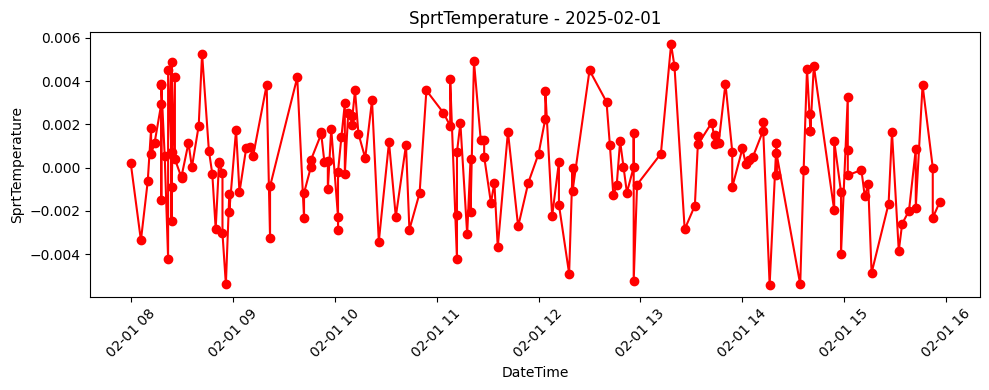

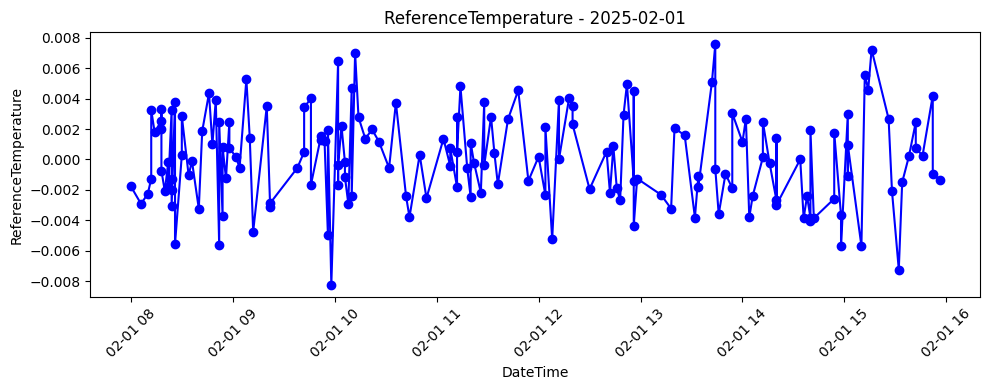

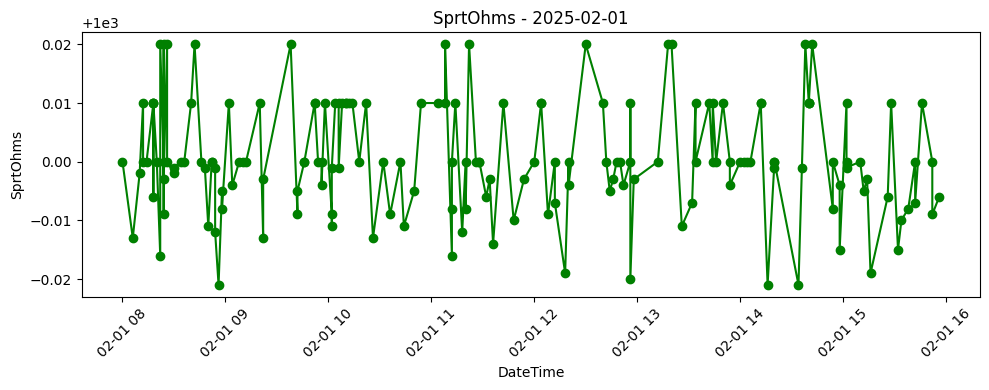

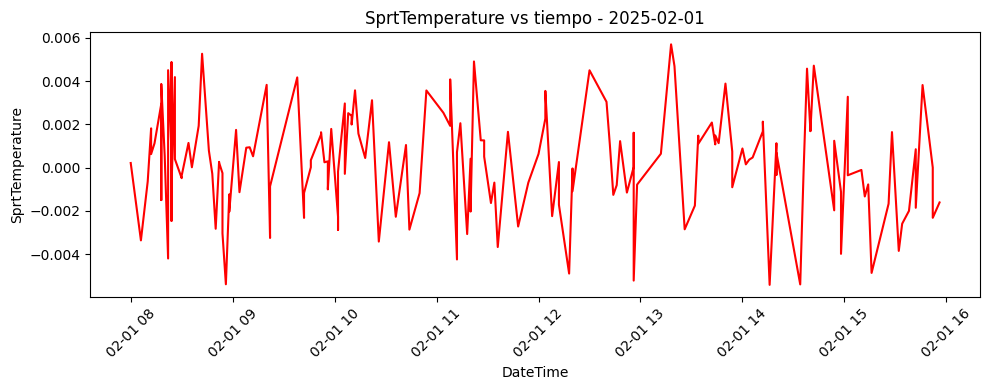

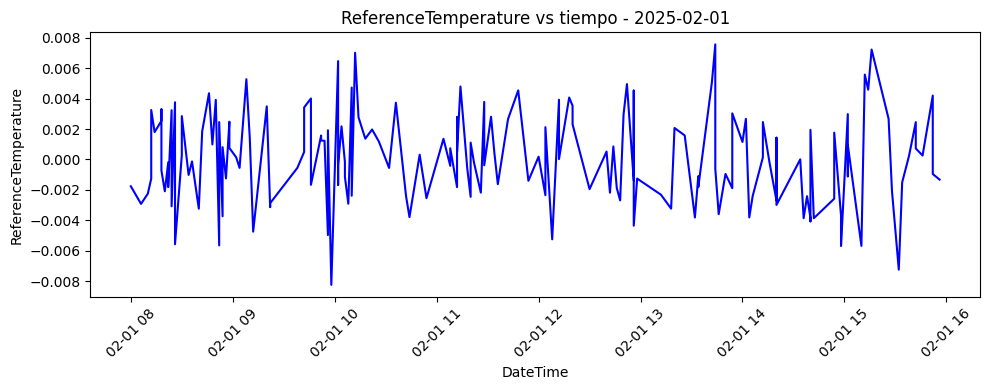

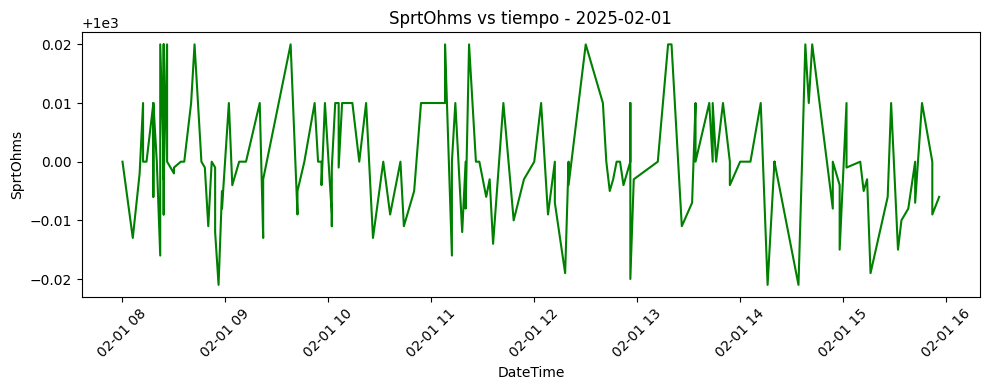

In [ ]:
color_map = {
    "SprtTemperature": "red",
    "ReferenceTemperature": "blue",
    "SprtOhms": "green"
}

# 6) Gráficos con columnas reales del dataset (si existen)
plot_cols = [c for c in ["SprtTemperature", "ReferenceTemperature", "SprtOhms"] if c in df_day.columns]

if "DateTime" not in df_day.columns:
    print("No hay 'DateTime' en el filtrado; no se grafican series temporales.")
else:
    for col in plot_cols:
        tmp = df_day[["DateTime", col]].dropna().sort_values(by="DateTime")
        if tmp.empty:
            continue
        plt.figure(figsize=(10,4))
        plt.plot(tmp["DateTime"], tmp[col], marker="o", color=color_map.get(col, "black"))
        plt.title(f"{col} - {target_day}")
        plt.xlabel("DateTime"); plt.ylabel(col)
        plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# 7) Repite el patrón de gráficos de tu ejemplo original
for col in plot_cols:
    tmp = df_day[["DateTime", col]].dropna().sort_values(by="DateTime")
    if not tmp.empty:
        plt.figure(figsize=(10,4))
        plt.plot(tmp["DateTime"], tmp[col], color=color_map.get(col, "black"))
        plt.title(f"{col} vs tiempo - {target_day}")
        plt.xlabel("DateTime"); plt.ylabel(col)
        plt.xticks(rotation=45); plt.tight_layout(); plt.show()

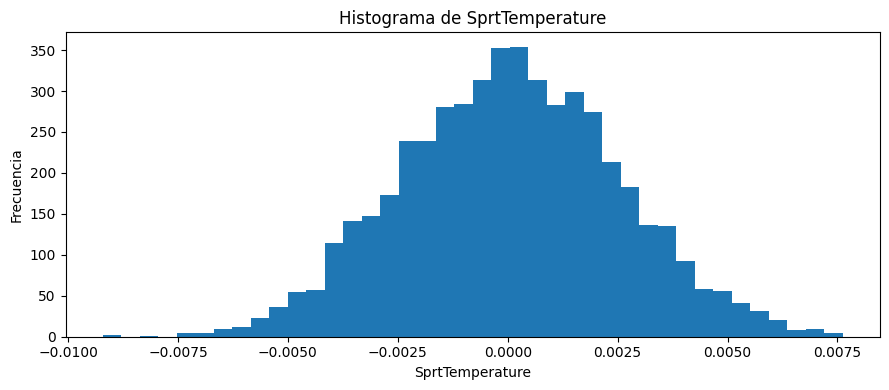

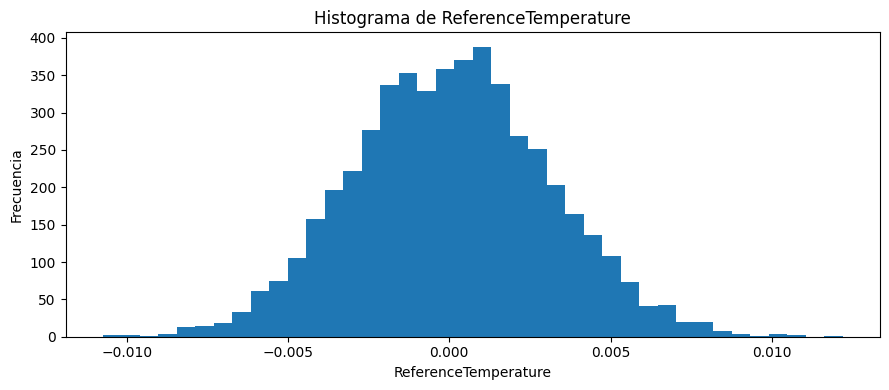

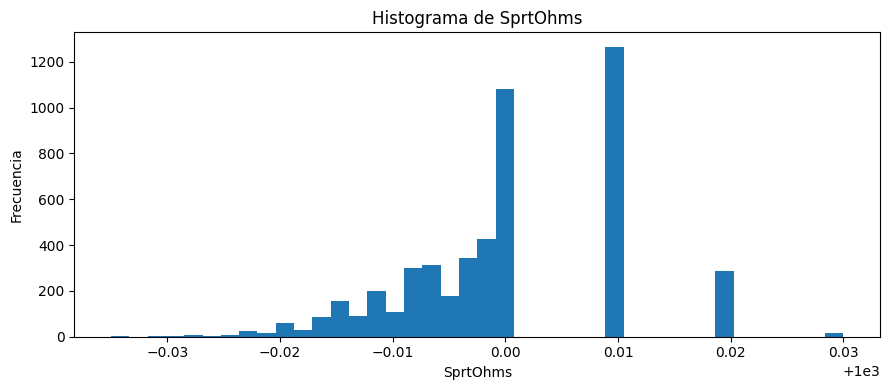

In [ ]:
from typing import Optional, List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


class Visualizer:
    """Clase para mostrar histogramas de columnas numéricas de un DataFrame."""
    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()

    @classmethod
    def from_csv(
        cls,
        path: Optional[str] = None,
        sep: str = ",",
        encoding: str = "utf-8"
    ) -> "Visualizer":
        """
        Carga el CSV y devuelve una instancia de Visualizer.
        Si no se pasa `path`, intenta rutas comunes para tu archivo.
        """
        candidates: List[Path] = []
        if path:
            candidates.append(Path(path))
        # Rutas típicas en este entorno y nombre exacto de tu archivo
        candidates += [
            Path("/mnt/data/1_DataTime_Point_TPW.csv"),
            Path("1_DataTime_Point_TPW.csv"),
        ]

        for p in candidates:
            if p.is_file():
                df = pd.read_csv(p, sep=sep, encoding=encoding, low_memory=False)
                return cls(df)

        # Búsqueda recursiva por si el archivo está en un subdirectorio
        matches = list(Path(".").rglob("1_DataTime_Point_TPW*.csv"))
        if matches:
            df = pd.read_csv(matches[0], sep=sep, encoding=encoding, low_memory=False)
            return cls(df)

        raise FileNotFoundError(
            "No encontré el CSV. Pasa la ruta absoluta, por ejemplo:\n"
            "  viz = Visualizer.from_csv('/mnt/data/1_DataTime_Point_TPW.csv')"
        )

    def histogram(self, value_col: str, bins: int = 30, title: Optional[str] = None) -> None:
        """
        Muestra un histograma de la columna indicada.
        - Si la columna no es numérica, intenta convertirla (coerce).
        - Si no hay datos válidos, informa y no dibuja.
        """
        if value_col not in self.df.columns:
            print(f"Aviso: columna '{value_col}' no existe en el DataFrame; se omite.")
            return

        serie = self.df[value_col]
        if not np.issubdtype(serie.dtype, np.number):
            serie = pd.to_numeric(serie, errors="coerce")
        serie = serie.dropna()

        if serie.empty:
            print(f"No hay datos numéricos para '{value_col}'.")
            return

        plt.figure(figsize=(9, 4))
        plt.hist(serie, bins=bins)  # sin estilos/colores explícitos
        plt.title(title or f"Histograma de {value_col}")
        plt.xlabel(value_col)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

    def histograms(self, cols: List[str], bins: int = 30) -> None:
        """
        Muestra varios histogramas en secuencia.
        """
        for col in cols:
            self.histogram(col, bins=bins)


# ====== Ejecución directa adaptada a TU BASE ======
if __name__ == "__main__":
    # Carga directamente desde la ruta donde está tu archivo en este entorno
    viz = Visualizer.from_csv("/mnt/data/1_DataTime_Point_TPW.csv")

    # Muestra histogramas de las columnas clave de tu base
    viz.histograms(
        ["SprtTemperature", "ReferenceTemperature", "SprtOhms"],
        bins=40 )



4.

In [ ]:
"""
Derivada numérica de SprtTemperature a lo largo del tiempo (d(SprtTemperature)/dt).
- Lee el CSV (por defecto: /mnt/data/1_DataTime_Point_TPW.csv)
- Construye DateTime = Date + Time
- Ordena en el tiempo y consolida timestamps duplicados
- Interpola faltantes en SprtTemperature (lineal, sobre el propio tiempo)
- Calcula la derivada con np.gradient considerando tiempos irregulares
- Exporta un CSV con columnas: DateTime, t_seconds, SprtTemperature, SprtTemperature_d_dt
"""

from pathlib import Path
from typing import Optional, List
import numpy as np
import pandas as pd


# ---------- Config ----------
DEFAULT_CANDIDATES = [
    Path("/mnt/data/1_DataTime_Point_TPW.csv"),
    Path("1_DataTime_Point_TPW.csv"),
]
OUT_CSV = "sprt_temperature_derivative.csv"


# ---------- Utilidades ----------
def load_csv(path: Optional[str] = None) -> pd.DataFrame:
    """Carga el CSV desde una ruta o desde ubicaciones conocidas."""
    candidates: List[Path] = []
    if path:
        candidates.append(Path(path))
    candidates += DEFAULT_CANDIDATES

    for p in candidates:
        if p.is_file():
            return pd.read_csv(p, low_memory=False)

    # Búsqueda recursiva como último recurso
    matches = list(Path(".").rglob("1_DataTime_Point_TPW*.csv"))
    if matches:
        return pd.read_csv(matches[0], low_memory=False)

    raise FileNotFoundError(f"No se encontró el CSV. Probé: {[str(p) for p in candidates]} y búsqueda recursiva.")


def ensure_datetime(df: pd.DataFrame, date_col="Date", time_col="Time", out_col="DateTime") -> pd.DataFrame:
    """Crea/asegura una columna datetime combinando Date + Time."""
    if out_col in df.columns and np.issubdtype(df[out_col].dtype, np.datetime64):
        return df
    if date_col not in df.columns or time_col not in df.columns:
        raise KeyError(f"Se requieren columnas '{date_col}' y '{time_col}' para construir '{out_col}'.")
    df[out_col] = pd.to_datetime(df[date_col].astype(str) + " " + df[time_col].astype(str), errors="coerce")
    return df


def sort_and_consolidate(df: pd.DataFrame, time_col="DateTime") -> pd.DataFrame:
    """
    Ordena por tiempo y promedia filas con el mismo timestamp (sólo columnas numéricas).
    Elimina filas con DateTime nulo.
    """
    df = df.dropna(subset=[time_col]).copy()
    df = df.groupby(time_col, as_index=False).mean(numeric_only=True)
    df = df.sort_values(by=time_col).reset_index(drop=True)
    return df


def seconds_since_start(df: pd.DataFrame, time_col="DateTime") -> np.ndarray:
    """Convierte la columna temporal a segundos transcurridos desde el primer timestamp."""
    t0 = df[time_col].iloc[0]
    return (df[time_col] - t0).dt.total_seconds().to_numpy(dtype=float)


def numeric_series(df: pd.DataFrame, col: str) -> np.ndarray:
    """Devuelve la serie como float (coerce), conservando NaN donde no sea convertible."""
    if col not in df.columns:
        raise KeyError(f"Columna '{col}' no encontrada.")
    return pd.to_numeric(df[col], errors="coerce").to_numpy(dtype=float)


def fill_nan_linear(y: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Interpola NaNs de y en función de t (segundos). Para extremos, mantiene el valor válido más cercano.
    """
    y_filled = y.copy()
    mask = np.isfinite(y)
    if mask.sum() == 0:
        return y_filled  # todo NaN; devolvemos tal cual
    # np.interp requiere t creciente y rellena con extremos
    y_filled[~mask] = np.interp(t[~mask], t[mask], y[mask])
    return y_filled


def derivative_wrt_time(y: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Derivada numérica dy/dt usando numpy.gradient con tiempos (t) irregulares.
    Requiere al menos 3 puntos para una derivada razonable.
    """
    if len(y) < 3:
        return np.full_like(y, np.nan, dtype=float)
    return np.gradient(y, t)


# ---------- Flujo principal ----------
def main(path: Optional[str] = "/mnt/data/1_DataTime_Point_TPW.csv") -> pd.DataFrame:
    # 1) Carga y preparación temporal
    df = load_csv(path)
    df = ensure_datetime(df, "Date", "Time", "DateTime")
    df = sort_and_consolidate(df, "DateTime")
    t = seconds_since_start(df, "DateTime")
    df["t_seconds"] = t

    # 2) Serie objetivo SprtTemperature (float) e interpolación de faltantes
    y = numeric_series(df, "SprtTemperature")
    y_interp = fill_nan_linear(y, t)

    # 3) Derivada
    dy_dt = derivative_wrt_time(y_interp, t)
    df["SprtTemperature_d_dt"] = dy_dt

    # 4) Exportar resultado mínimo
    out = df[["DateTime", "t_seconds", "SprtTemperature", "SprtTemperature_d_dt"]]
    out.to_csv(OUT_CSV, index=False)

    # 5) Mensaje resumen
    mean_abs_der = float(np.nanmean(np.abs(out["SprtTemperature_d_dt"]))) if len(out) else float("nan")
    print(f"✔ Filas procesadas: {len(out)}")
    print(f"✔ Promedio |d(SprtTemperature)/dt| (°C/s): {mean_abs_der:.6f}")
    print(f"✔ Archivo exportado: {OUT_CSV}")

    return out


if __name__ == "__main__":
    main()


✔ Filas procesadas: 3549
✔ Promedio |d(SprtTemperature)/dt| (°C/s): 0.000011
✔ Archivo exportado: sprt_temperature_derivative.csv


In [ ]:
# -*- coding: utf-8 -*-
"""
Derivada numérica de ReferenceTemperature a lo largo del tiempo (d(ReferenceTemperature)/dt).
- Lee el CSV (por defecto: /mnt/data/1_DataTime_Point_TPW.csv)
- Construye DateTime = Date + Time
- Ordena en el tiempo y consolida timestamps duplicados (promedio de columnas numéricas)
- Interpola faltantes en ReferenceTemperature (lineal, en función de t en segundos)
- Calcula la derivada con np.gradient considerando tiempos irregulares
- Exporta: reference_temperature_derivative.csv con columnas:
  [DateTime, t_seconds, ReferenceTemperature, ReferenceTemperature_d_dt]
"""

from pathlib import Path
from typing import Optional, List
import numpy as np
import pandas as pd


# ---------------- Configuración ----------------
DEFAULT_CANDIDATES = [
    Path("/mnt/data/1_DataTime_Point_TPW.csv"),
    Path("1_DataTime_Point_TPW.csv"),
]
OUT_CSV = "reference_temperature_derivative.csv"
DATE_COL, TIME_COL, DT_COL = "Date", "Time", "DateTime"
TARGET_COL = "ReferenceTemperature"
DERIV_COL = "ReferenceTemperature_d_dt"


# ---------------- Utilidades ----------------
def load_csv(path: Optional[str] = None) -> pd.DataFrame:
    """Carga el CSV desde una ruta o desde ubicaciones conocidas; si no, busca recursivamente."""
    candidates: List[Path] = []
    if path:
        candidates.append(Path(path))
    candidates += DEFAULT_CANDIDATES

    for p in candidates:
        if p.is_file():
            return pd.read_csv(p, low_memory=False)

    matches = list(Path(".").rglob("1_DataTime_Point_TPW*.csv"))
    if matches:
        return pd.read_csv(matches[0], low_memory=False)

    raise FileNotFoundError(f"No se encontró el CSV. Probé: {[str(p) for p in candidates]} y búsqueda recursiva.")


def ensure_datetime(df: pd.DataFrame, date_col=DATE_COL, time_col=TIME_COL, out_col=DT_COL) -> pd.DataFrame:
    """Crea/asegura una columna datetime combinando Date + Time."""
    if out_col in df.columns and np.issubdtype(df[out_col].dtype, np.datetime64):
        return df
    if date_col not in df.columns or time_col not in df.columns:
        raise KeyError(f"Se requieren columnas '{date_col}' y '{time_col}' para construir '{out_col}'.")
    df[out_col] = pd.to_datetime(df[date_col].astype(str) + " " + df[time_col].astype(str), errors="coerce")
    return df


def sort_and_consolidate(df: pd.DataFrame, time_col=DT_COL) -> pd.DataFrame:
    """
    Ordena por tiempo y promedia filas con el mismo timestamp (sólo columnas numéricas).
    Elimina filas con DateTime nulo.
    """
    df = df.dropna(subset=[time_col]).copy()
    df = df.groupby(time_col, as_index=False).mean(numeric_only=True)
    df = df.sort_values(by=time_col).reset_index(drop=True)
    return df


def seconds_since_start(df: pd.DataFrame, time_col=DT_COL) -> np.ndarray:
    """Convierte la columna temporal a segundos desde el primer timestamp."""
    t0 = df[time_col].iloc[0]
    return (df[time_col] - t0).dt.total_seconds().to_numpy(dtype=float)


def numeric_series(df: pd.DataFrame, col: str) -> np.ndarray:
    """Devuelve la serie como float (coerce), conservando NaN donde no sea convertible."""
    if col not in df.columns:
        raise KeyError(f"Columna '{col}' no encontrada.")
    return pd.to_numeric(df[col], errors="coerce").to_numpy(dtype=float)


def fill_nan_linear(y: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Interpola NaNs de y en función de t (segundos). En extremos, usa extrapolación
    implícita de np.interp (valor del borde más cercano).
    """
    y_filled = y.copy()
    mask = np.isfinite(y)
    if mask.sum() == 0:
        return y_filled  # todo NaN; devolvemos tal cual
    y_filled[~mask] = np.interp(t[~mask], t[mask], y[mask])
    return y_filled


def derivative_wrt_time(y: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Derivada numérica dy/dt con numpy.gradient usando tiempos t (posible espaciamiento irregular).
    Requiere al menos 3 puntos para una derivada razonable.
    """
    if len(y) < 3:
        return np.full_like(y, np.nan, dtype=float)
    return np.gradient(y, t)


# ---------------- Flujo principal ----------------
def main(path: Optional[str] = "/mnt/data/1_DataTime_Point_TPW.csv") -> pd.DataFrame:
    # 1) Carga + DateTime + orden/compactación
    df = load_csv(path)
    df = ensure_datetime(df, DATE_COL, TIME_COL, DT_COL)
    df = sort_and_consolidate(df, DT_COL)

    # 2) Tiempo en segundos
    t = seconds_since_start(df, DT_COL)
    df["t_seconds"] = t

    # 3) Serie objetivo (float) + interpolación de faltantes
    y = numeric_series(df, TARGET_COL)
    y_interp = fill_nan_linear(y, t)

    # 4) Derivada
    df[DERIV_COL] = derivative_wrt_time(y_interp, t)

    # 5) Exportar el resultado mínimo
    out = df[[DT_COL, "t_seconds", TARGET_COL, DERIV_COL]].copy()
    out.to_csv(OUT_CSV, index=False)

    # 6) Mensaje de resumen
    mean_abs_der = float(np.nanmean(np.abs(out[DERIV_COL]))) if len(out) else float("nan")
    print(f"✔ Filas procesadas: {len(out)}")
    print(f"✔ Promedio |d({TARGET_COL})/dt|: {mean_abs_der:.6f} (unidades por segundo)")
    print(f"✔ Archivo exportado: {OUT_CSV}")

    return out


if __name__ == "__main__":
    main()

✔ Filas procesadas: 3549
✔ Promedio |d(ReferenceTemperature)/dt|: 0.000014 (unidades por segundo)
✔ Archivo exportado: reference_temperature_derivative.csv


In [ ]:
"""
Derivada numérica de SprtOhms a lo largo del tiempo (d(SprtOhms)/dt).
- Lee el CSV (por defecto: /mnt/data/1_DataTime_Point_TPW.csv)
- Construye DateTime = Date + Time
- Ordena por tiempo y consolida timestamps duplicados (promedia columnas numéricas)
- Interpola faltantes en SprtOhms (lineal, en función de t en segundos)
- Calcula la derivada con np.gradient considerando tiempos irregulares
- Exporta: sprt_ohms_derivative.csv con columnas:
  [DateTime, t_seconds, SprtOhms, SprtOhms_d_dt]
"""

from pathlib import Path
from typing import Optional, List
import numpy as np
import pandas as pd

# ---------------- Configuración ----------------
DEFAULT_CANDIDATES = [
    Path("/mnt/data/1_DataTime_Point_TPW.csv"),
    Path("1_DataTime_Point_TPW.csv"),
]
OUT_CSV = "sprt_ohms_derivative.csv"
DATE_COL, TIME_COL, DT_COL = "Date", "Time", "DateTime"
TARGET_COL = "SprtOhms"
DERIV_COL = "SprtOhms_d_dt"


# ---------------- Utilidades ----------------
def load_csv(path: Optional[str] = None) -> pd.DataFrame:
    """Carga el CSV desde una ruta o desde ubicaciones conocidas; si no, busca recursivamente."""
    candidates: List[Path] = []
    if path:
        candidates.append(Path(path))
    candidates += DEFAULT_CANDIDATES

    for p in candidates:
        if p.is_file():
            return pd.read_csv(p, low_memory=False)

    matches = list(Path(".").rglob("1_DataTime_Point_TPW*.csv"))
    if matches:
        return pd.read_csv(matches[0], low_memory=False)

    raise FileNotFoundError(f"No se encontró el CSV. Probé: {[str(p) for p in candidates]} y búsqueda recursiva.")


def ensure_datetime(df: pd.DataFrame, date_col=DATE_COL, time_col=TIME_COL, out_col=DT_COL) -> pd.DataFrame:
    """Crea/asegura una columna datetime combinando Date + Time."""
    if out_col in df.columns and np.issubdtype(df[out_col].dtype, np.datetime64):
        return df
    if date_col not in df.columns or time_col not in df.columns:
        raise KeyError(f"Se requieren columnas '{date_col}' y '{time_col}' para construir '{out_col}'.")
    df[out_col] = pd.to_datetime(df[date_col].astype(str) + " " + df[time_col].astype(str), errors="coerce")
    return df


def sort_and_consolidate(df: pd.DataFrame, time_col=DT_COL) -> pd.DataFrame:
    """
    Ordena por tiempo y promedia filas con el mismo timestamp (sólo columnas numéricas).
    Elimina filas con DateTime nulo.
    """
    df = df.dropna(subset=[time_col]).copy()
    df = df.groupby(time_col, as_index=False).mean(numeric_only=True)
    df = df.sort_values(by=time_col).reset_index(drop=True)
    return df


def seconds_since_start(df: pd.DataFrame, time_col=DT_COL) -> np.ndarray:
    """Convierte la columna temporal a segundos desde el primer timestamp."""
    t0 = df[time_col].iloc[0]
    return (df[time_col] - t0).dt.total_seconds().to_numpy(dtype=float)


def numeric_series(df: pd.DataFrame, col: str) -> np.ndarray:
    """Devuelve la serie como float (coerce), conservando NaN donde no sea convertible."""
    if col not in df.columns:
        raise KeyError(f"Columna '{col}' no encontrada.")
    return pd.to_numeric(df[col], errors="coerce").to_numpy(dtype=float)


def fill_nan_linear(y: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Interpola NaNs de y en función de t (segundos). En extremos usa el valor válido más cercano.
    """
    y_filled = y.copy()
    mask = np.isfinite(y)
    if mask.sum() == 0:
        return y_filled  # todo NaN; no hay nada que interpolar
    y_filled[~mask] = np.interp(t[~mask], t[mask], y[mask])
    return y_filled


def derivative_wrt_time(y: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Derivada numérica dy/dt con numpy.gradient usando tiempos t (posible espaciamiento irregular).
    Requiere al menos 3 puntos para una derivada razonable.
    """
    if len(y) < 3:
        return np.full_like(y, np.nan, dtype=float)
    return np.gradient(y, t)


# ---------------- Flujo principal ----------------
def main(path: Optional[str] = "/mnt/data/1_DataTime_Point_TPW.csv") -> pd.DataFrame:
    # 1) Carga + DateTime + orden/compactación
    df = load_csv(path)
    df = ensure_datetime(df, DATE_COL, TIME_COL, DT_COL)
    df = sort_and_consolidate(df, DT_COL)

    # 2) Tiempo en segundos
    t = seconds_since_start(df, DT_COL)
    df["t_seconds"] = t

    # 3) Serie objetivo (float) + interpolación de faltantes
    y = numeric_series(df, TARGET_COL)
    y_interp = fill_nan_linear(y, t)

    # 4) Derivada
    df[DERIV_COL] = derivative_wrt_time(y_interp, t)

    # 5) Exportar el resultado mínimo
    out = df[[DT_COL, "t_seconds", TARGET_COL, DERIV_COL]].copy()
    out.to_csv(OUT_CSV, index=False)

    # 6) Mensaje de resumen
    mean_abs_der = float(np.nanmean(np.abs(out[DERIV_COL]))) if len(out) else float("nan")
    print(f"✔ Filas procesadas: {len(out)}")
    print(f"✔ Promedio |d({TARGET_COL})/dt|: {mean_abs_der:.6f} (unidades por segundo)")
    print(f"✔ Archivo exportado: {OUT_CSV}")

    return out


if __name__ == "__main__":
    main()

✔ Filas procesadas: 3549
✔ Promedio |d(SprtOhms)/dt|: 0.000044 (unidades por segundo)
✔ Archivo exportado: sprt_ohms_derivative.csv


5.

In [ ]:
a = np.array([1,0,1,1,4,1,0,0,0,1,0])
a

array([1, 0, 1, 1, 4, 1, 0, 0, 0, 1, 0])

In [ ]:
b = [False,  True, False, False, True, False,  True,  True,  True,
       True,  True]
b

[False, True, False, False, True, False, True, True, True, True, True]

In [ ]:
a[b]

array([0, 4, 0, 0, 0, 1, 0])